In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import time



In [35]:
#empty list for holding the latitude & longitude combinations
lat_lngs = []

#emply list to hold city names
cities = []
# range of latitudes and longitudes 
lat_range = (-90,90)
lng_range = (-180,180)

#set of ranom lat and lng comibnations
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    
    # if the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [36]:
url ="http://api.openweathermap.org/data/2.5/weather?"

#query_url = f"{url}appid={weather_api_key}&q={cities}"
#response = requests.get(query_url).json()
#response

# define an empty list to fetch the weather data for each city
city_data = []

#print the logger
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters 

record_count = 1 
set_count = 1

# loop thru all the cities in our list to fetch weather data 

for i, city, in enumerate(cities):
    
    
    #group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >=50):
        
        set_count += 1 
        record_count = 0 
    
#create endpoint URL with each city 

            
    print("Processing Record %s of set %s| %s" % (record_count,set_count,city))
        
    record_count += 1 
    # run an API request for each of the citites
    city_url = f"{url}appid={weather_api_key}&q={city}"
    responseJSON = requests.get(city_url).json()
    #print(city_url)
   # responseJSON = response.json()
    
        
    try:
        
          
        city_weather = responseJSON['main']['temp']
        city_lat = responseJSON['coord']['lat']
        city_lng = responseJSON['coord']['lon']
        city_max_temp = responseJSON['main']['temp_max']
        city_humidity = responseJSON['main']['humidity']
        city_clouds = responseJSON['clouds']['all']
        city_wind = responseJSON['wind']['speed']
        city_country = responseJSON['sys']['country']
        city_date = responseJSON['dt']
        
        
        city_data.append({"City": city,
                          
                          
                      
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
   
                          
    except:
                        
        print("City not found. Skipping...")
        pass
                          
                          

  

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
responseJSON     

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1| east london
Processing Record 2 of set 1| igarka
Processing Record 3 of set 1| muskogee
Processing Record 4 of set 1| isangel
Processing Record 5 of set 1| ushuaia
Processing Record 6 of set 1| carnarvon
Processing Record 7 of set 1| doctor juan manuel frutos
Processing Record 8 of set 1| saint george
Processing Record 9 of set 1| port alfred
Processing Record 10 of set 1| kapaa
Processing Record 11 of set 1| yellowknife
Processing Record 12 of set 1| tuktoyaktuk
Processing Record 13 of set 1| taolanaro
City not found. Skipping...
Processing Record 14 of set 1| nicoya
Processing Record 15 of set 1| albany
Processing Record 16 of set 1| belushya guba
City not found. Skipping...
Processing Record 17 of set 1| cape town
Processing Record 18 of set 1| tsihombe
City not found. Skipping...
Processing Record 19 of set 1| havoysund
Processing Record 20 of set 1| butaritari
Processing Record 21 of set 1| ken

Processing Record 41 of set 4| port hawkesbury
Processing Record 42 of set 4| sitka
Processing Record 43 of set 4| maimon
City not found. Skipping...
Processing Record 44 of set 4| sorland
Processing Record 45 of set 4| phetchaburi
Processing Record 46 of set 4| burns lake
Processing Record 47 of set 4| maningrida
Processing Record 48 of set 4| khuzhir
Processing Record 49 of set 4| ribeira grande
Processing Record 0 of set 5| moerai
Processing Record 1 of set 5| kazachinskoye
Processing Record 2 of set 5| marang
Processing Record 3 of set 5| kamaishi
Processing Record 4 of set 5| fare
Processing Record 5 of set 5| comodoro rivadavia
Processing Record 6 of set 5| noumea
Processing Record 7 of set 5| trairi
Processing Record 8 of set 5| sakakah
Processing Record 9 of set 5| nalut
Processing Record 10 of set 5| muravlenko
Processing Record 11 of set 5| marcona
City not found. Skipping...
Processing Record 12 of set 5| amderma
City not found. Skipping...
Processing Record 13 of set 5| hop

Processing Record 36 of set 8| tura
Processing Record 37 of set 8| conceicao do araguaia
Processing Record 38 of set 8| nehe
Processing Record 39 of set 8| padang
Processing Record 40 of set 8| ayan
Processing Record 41 of set 8| boshnyakovo
Processing Record 42 of set 8| banepa
Processing Record 43 of set 8| sao miguel do araguaia
Processing Record 44 of set 8| roald
Processing Record 45 of set 8| saint-joseph
Processing Record 46 of set 8| omsukchan
Processing Record 47 of set 8| kirakira
Processing Record 48 of set 8| villanueva de cordoba
Processing Record 49 of set 8| rangapara
Processing Record 0 of set 9| manicore
Processing Record 1 of set 9| ngukurr
City not found. Skipping...
Processing Record 2 of set 9| svetlaya
Processing Record 3 of set 9| abu jubayhah
City not found. Skipping...
Processing Record 4 of set 9| kodinsk
Processing Record 5 of set 9| aanekoski
Processing Record 6 of set 9| kalaleh
Processing Record 7 of set 9| klyuchi
Processing Record 8 of set 9| beian
Proce

Processing Record 23 of set 12| mtinko
Processing Record 24 of set 12| quatre cocos
Processing Record 25 of set 12| pakxe
Processing Record 26 of set 12| novovarshavka
Processing Record 27 of set 12| korla
Processing Record 28 of set 12| baikingon
Processing Record 29 of set 12| sao gabriel
Processing Record 30 of set 12| honiara
Processing Record 31 of set 12| redmond
Processing Record 32 of set 12| vila do maio
Processing Record 33 of set 12| diofior
Processing Record 34 of set 12| gold coast
Processing Record 35 of set 12| yima
Processing Record 36 of set 12| progreso
Processing Record 37 of set 12| tazovskiy
Processing Record 38 of set 12| la orilla
Processing Record 39 of set 12| tuatapere
Processing Record 40 of set 12| yasothon
Processing Record 41 of set 12| lincoln
Processing Record 42 of set 12| pryazha
Processing Record 43 of set 12| ouricuri
Processing Record 44 of set 12| port keats
Processing Record 45 of set 12| atakpame
Processing Record 46 of set 12| abbeville
Processi

{'coord': {'lon': -71.1419, 'lat': 21.4612},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 297.79,
  'feels_like': 298.01,
  'temp_min': 297.79,
  'temp_max': 297.79,
  'pressure': 1016,
  'humidity': 65,
  'sea_level': 1016,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 8.28, 'deg': 99, 'gust': 8.85},
 'clouds': {'all': 0},
 'dt': 1677812906,
 'sys': {'country': 'TC', 'sunrise': 1677755087, 'sunset': 1677797344},
 'timezone': -18000,
 'id': 3576994,
 'name': 'Cockburn Town',
 'cod': 200}

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.json_normalize(city_data)
city_data_df.head()
# Show Record Count

city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [42]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,295.03,83,13,6.15,ZA,1677812630
1,igarka,67.4667,86.5833,264.18,92,100,8.85,RU,1677812630
2,muskogee,35.5834,-95.3336,287.19,93,100,5.14,US,1677812631
3,isangel,-19.5500,169.2667,300.19,88,100,10.63,VU,1677812631
4,ushuaia,-54.8000,-68.3000,278.96,70,40,12.35,AR,1677812507


In [43]:
#export the city_data to a csv

city_data_df.to_csv("output_data/cities.csv",index_label="City_ID")

city_data_df = pd.read_csv("output_data/cities.csv",index_col="City_ID")
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,295.03,83,13,6.15,ZA,1677812630
1,igarka,67.4667,86.5833,264.18,92,100,8.85,RU,1677812630
2,muskogee,35.5834,-95.3336,287.19,93,100,5.14,US,1677812631
3,isangel,-19.5500,169.2667,300.19,88,100,10.63,VU,1677812631
4,ushuaia,-54.8000,-68.3000,278.96,70,40,12.35,AR,1677812507


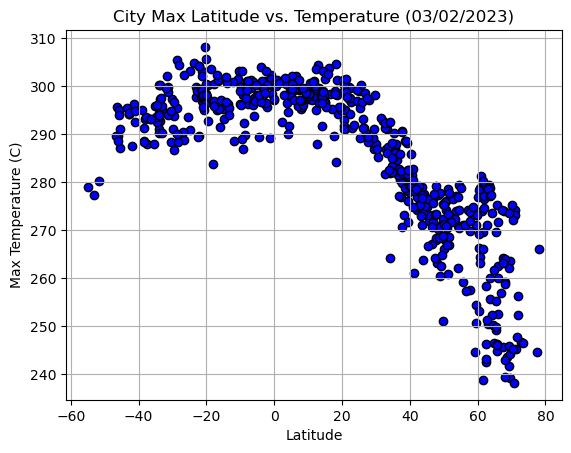

In [84]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

#xvalue = city_data_df.loc[city_data_df["Lat"]]
xvalue = city_data_df["Lat"]
yvalue = city_data_df["Max Temp"]

today = pd.Timestamp("today").strftime("%m/%d/%Y")
#Timestamp('2015-10-14 00:00:00')
#today = to_datetime
plt.scatter(xvalue,yvalue,edgecolors='k',color='b')
plt.grid()
plt.title(f"City Max Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
